4.1~4.4

In [ ]:
from IPython.display import display
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler,PowerTransformer
from sklearn.preprocessing import OneHotEncoder
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
import os

data= pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"adult.data"),
                 header=None,index_col=False,
                 names=['age','workclass','fnlwgt','education','education-num','marital-status',
                       'occupation','relationship','race','gender','capital-gain','capital-loss',
                      'hours-per-week','native-country','income'])
data=data[['age','workclass','education','gender','hours-per-week','occupation','income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [4]:
data_dummies=pd.get_dummies(data)

In [5]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
features=data_dummies.loc[:,'age':'occupation_ Transport-moving']
X=features.values
y=data_dummies['income_ >50K'].values

In [7]:
data_features=data.drop("income",axis=1)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct=ColumnTransformer(
    [("scaling",StandardScaler(),['age','hours-per-week']),
    ("onehot",OneHotEncoder(sparse=False),
    ['workclass', 'education', 'gender', 'occupation'])])


In [11]:
data_features=data.drop("income",axis=1)

X_train,X_test,y_train,y_test=train_test_split(data_features,data.income,random_state=0)

ct.fit(X_train)
X_train_trans=ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [14]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans,y_train)

X_test_trans=ct.transform(X_test)

In [16]:
logreg.score(X_test_trans,y_test)

0.808991524382754

In [17]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

In [18]:
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (['age','hours-per-week'],StandardScaler()),
    (['workclass','education','gender','occupation'],OneHotEncoder(sparse=False)))

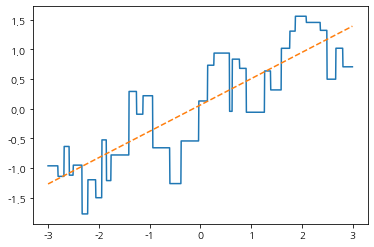

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X,y=mglearn.datasets.make_wave(n_samples=120)
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

reg=DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line,reg.predict(line),label="결정 트리")

reg=LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),'--',label='선형 회귀')

In [27]:
from sklearn.preprocessing import KBinsDiscretizer

kb=KBinsDiscretizer(n_bins=10,strategy='uniform')
kb.fit(X)
kb.bin_edges_

array([array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])], dtype=object)

In [29]:
X_binned=kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [31]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [32]:
kb=KBinsDiscretizer(n_bins=10,strategy='uniform',encode='onehot-dense')
kb.fit(X)
X_binned=kb.transform(X)

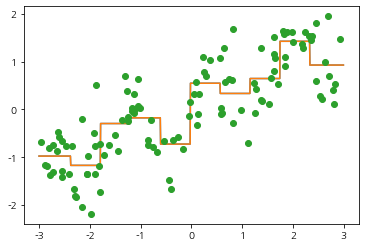

In [36]:
line_binned=kb.transform(line)

reg=LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_binned))

reg=DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line,reg.predict(line_binned))
plt.plot(X[:,0],y,'o')

5.1

In [39]:
from sklearn.datasets import make_blobs

X,y =make_blobs(random_state=0)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
logreg=LogisticRegression().fit(X_train,y_train)

In [40]:
logreg.score(X_test,y_test)

0.88

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

iris=load_iris()
logreg=LogisticRegression(max_iter=1000)
scores=cross_val_score(logreg,iris.data,iris.target,cv=3)

In [48]:
scores

array([0.98, 0.96, 0.98])

In [50]:
scores=cross_val_score(logreg,iris.data,iris.target,cv=5)

In [51]:
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [52]:
scores.mean()

0.9733333333333334

In [53]:
from  sklearn.model_selection import cross_validate

res=cross_validate(logreg,iris.data,iris.target,
                  return_train_score=True)
display(res)

{'fit_time': array([0.05601144, 0.06901312, 0.04100823, 0.03800869, 0.03700805]),
 'score_time': array([0.0010004 , 0.00100064, 0.        , 0.        , 0.00100017]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [54]:
res_df=pd.DataFrame(res)
display(res_df)

,fit_time,score_time,test_score,train_score
0,0.056011,0.001000,0.966667,0.966667
1,0.069013,0.001001,1.000000,0.966667
2,0.041008,0.000000,0.933333,0.983333
3,0.038009,0.000000,0.966667,0.983333
4,0.037008,0.001000,1.000000,0.975000


In [55]:
res_df.mean()

fit_time       0.048210
score_time     0.000600
test_score     0.973333
train_score    0.975000
dtype: float64

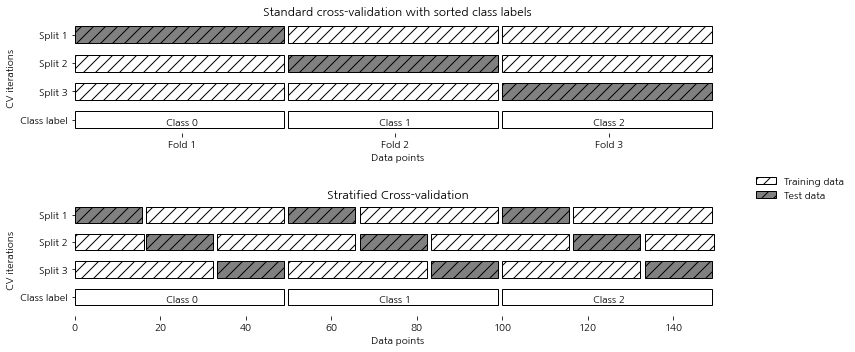

In [58]:
mglearn.plots.plot_stratified_cross_validation()

In [60]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5)

In [61]:
cross_val_score(logreg,iris.data,iris.target,cv=kfold)

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

In [62]:
kfold=KFold(n_splits=3)

In [63]:
cross_val_score(logreg,iris.data,iris.target,cv=kfold)

array([0., 0., 0.])

In [64]:
kfold=KFold(n_splits=3,shuffle=True,random_state=0)

In [65]:
cross_val_score(logreg,iris.data,iris.target,cv=kfold)

array([0.98, 0.96, 0.96])

In [66]:
kfold=KFold(n_splits=3,shuffle=True)

In [67]:
cross_val_score(logreg,iris.data,iris.target,cv=kfold)

array([0.96, 0.98, 0.94])

In [68]:
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()
scores=cross_val_score(logreg,iris.data,iris.target,cv=loo)

In [69]:
len(scores)

150

In [70]:
scores.mean()

0.9666666666666667

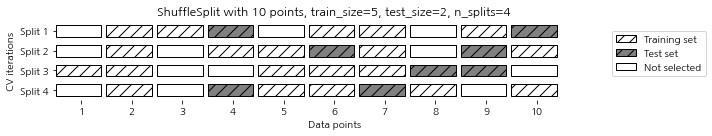

In [72]:
mglearn.plots.plot_shuffle_split()

In [73]:
from sklearn.model_selection import ShuffleSplit

shuffle_split=ShuffleSplit(test_size=.5,train_size=.5,n_splits=10)
scores=cross_val_score(logreg,iris.data,iris.target,cv=shuffle_split)

In [74]:
scores

array([0.93333333, 0.97333333, 0.96      , 0.97333333, 0.96      ,
       0.94666667, 0.96      , 0.96      , 0.96      , 0.97333333])

In [76]:
from sklearn.model_selection import GroupKFold

X,y=make_blobs(n_samples=12,random_state=0)
groups=[0,0,0,1,1,1,1,2,2,3,3,3]

In [77]:
scores=cross_val_score(logreg,X,y,groups=groups,cv=GroupKFold(n_splits=3))

In [78]:
scores

array([0.75      , 0.6       , 0.66666667])

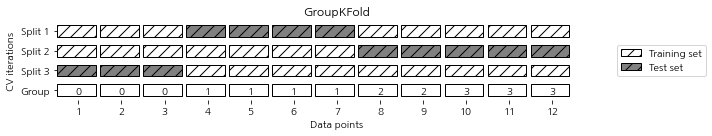

In [79]:
mglearn.plots.plot_group_kfold()

In [82]:
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold

logreg=LogisticRegression(max_iter=1000)

In [83]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold=RepeatedStratifiedKFold(random_state=42)


In [84]:
scores=scores=cross_val_score(logreg,iris.data,iris.target,cv=rskfold)

In [85]:
scores

array([1.        , 0.96666667, 0.93333333, 1.        , 0.93333333,
       0.96666667, 0.96666667, 0.93333333, 1.        , 0.96666667,
       0.93333333, 1.        , 1.        , 0.96666667, 0.96666667,
       0.9       , 1.        , 1.        , 0.93333333, 0.96666667,
       0.93333333, 0.96666667, 0.96666667, 1.        , 0.96666667,
       1.        , 0.96666667, 0.96666667, 0.9       , 1.        ,
       0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.93333333,
       0.96666667, 0.96666667, 1.        , 1.        , 0.9       ,
       0.96666667, 1.        , 0.9       , 0.96666667, 0.96666667,
       0.9       , 0.96666667, 0.96666667, 1.        , 0.96666667])

In [86]:
scores.mean()

0.9646666666666667

5.2.1

In [88]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=0)

In [89]:
best_score=0

In [90]:
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score=svm.score(X_test,y_test)
        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}

In [91]:
best_score

0.9736842105263158

In [92]:
best_parameters

{'C': 100, 'gamma': 0.001}

5.2.2

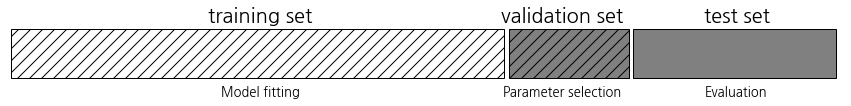

In [93]:
mglearn.plots.plot_threefold_split()